In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [2]:
movies=pd.read_csv(r"C:\Users\SAI VAMSI\Downloads\tmdb_5000_movies.csv")
credits=pd.read_csv(r"C:\Users\SAI VAMSI\Downloads\tmdb_5000_credits.csv")

In [3]:
print(movies.shape,credits.shape)

(4803, 20) (4803, 4)


In [4]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [5]:
credits_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df = movies.merge(credits_renamed, on='id')
movies_df.head()
movies_final = movies_df.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
votes=movies_final['vote_count']
vote_avg=movies_final['vote_average']
vote_mean=movies_final['vote_average'].mean()
top_250=movies_final['vote_count'].quantile(0.70)
movies_final['weighted_average']=((votes*vote_avg)+(top_250*vote_mean))/(votes+top_250)


In [7]:
movies_final['weighted_average']

0       7.148013
1       6.807627
2       6.276075
3       7.509565
4       6.098319
5       5.926859
6       7.205715
7       7.204498
8       7.270642
9       5.730040
10      5.603004
11      6.098717
12      6.909482
13      5.938607
14      6.465858
15      6.245387
16      7.338509
17      6.367653
18      6.186786
19      6.990367
20      6.466939
21      6.168343
22      7.428394
23      5.890102
24      6.498887
25      7.399552
26      7.025141
27      5.627663
28      6.474365
29      6.842658
          ...   
4773    6.831251
4774    6.090766
4775    6.094994
4776    6.142003
4777    6.090140
4778    6.075213
4779    6.128194
4780    6.092172
4781    6.092013
4782    6.114586
4783    5.925533
4784    6.094885
4785    6.092172
4786    6.082212
4787    6.050760
4788    6.109337
4789    6.109451
4790    6.106608
4791    6.085140
4792    6.220111
4793    6.091855
4794    6.092172
4795    6.092013
4796    6.521188
4797    6.097001
4798    6.239746
4799    6.090532
4800    6.1014

In [8]:
top_movies=movies_final.sort_values('weighted_average', ascending=False)

In [9]:
top_movies[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


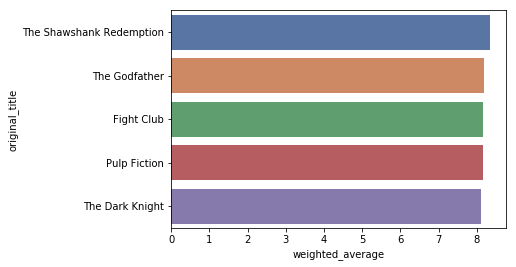

In [10]:
sns.barplot(x=top_movies['weighted_average'].head(), y=top_movies['original_title'].head(), data=top_movies, palette='deep')

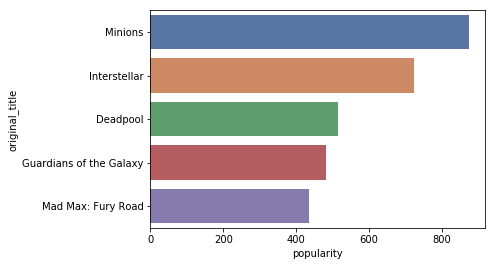

In [11]:
top_movies=movies_final.sort_values('popularity', ascending=False)
sns.barplot(x=top_movies['popularity'].head(), y=top_movies['original_title'].head(), data=top_movies, palette='deep')

In [12]:
min_max_scaler=preprocessing.MinMaxScaler()
movies_scaled = min_max_scaler.fit_transform(movies_final[['weighted_average', 'popularity']])
movies_norm = pd.DataFrame(movies_scaled,columns=['weighted_average', 'popularity'])
movies_final[['norm_weighted_average', 'norm_popularity']] = movies_norm
movies_final[['original_title','norm_weighted_average', 'norm_popularity']]
movies_final['score'] = (movies_final['norm_weighted_average']*0.5) + (movies_final['norm_popularity'])*0.5
movies_final['score']
movies_scored = movies_final.sort_values('score',ascending=False)
movies_scored[['original_title', 'norm_weighted_average', 'norm_popularity', 'score']]

,original_title,norm_weighted_average,norm_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


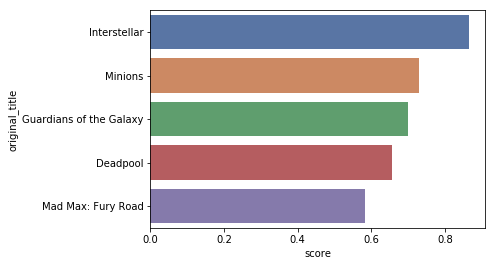

In [13]:
sns.barplot(x=movies_scored['score'].head(), y=movies_scored['original_title'].head(), data=movies_scored, palette='deep')

In [14]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,stop_words = 'english')
movies_final['overview']=movies_final['overview'].fillna(" ")
tfv_matrix = tfv.fit_transform(movies_final['overview'])
tfv_matrix.shape

(4803, 10417)

In [15]:
sig=sigmoid_kernel(tfv_matrix,tfv_matrix)
indices = pd.Series(movies_final.index, index=movies_final['original_title']).drop_duplicates()
def recommendedmovie(title,sig=sig):
    if(title in indices):
        ind=indices[title]
        sig_scores=list(enumerate(sig[ind]))
        sig_scores=sorted(sig_scores, key=lambda x: x[1], reverse=True)
        sig_scores = sig_scores[1:11]
        movie_indices = [i[0] for i in sig_scores]
        return movies_final['original_title'].iloc[movie_indices]
    else:
        print("Sorry we dont have data about the movie specified.")

In [16]:
recommendedmovie('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
2892                        Darling Companion
4403                           The Jimmy Show
990                        The Scarlet Letter
70                             Wild Wild West
2511                               Home Alone
Name: original_title, dtype: object